# ACME: Pandas 4
## Jincheng(Eric) Huang

1. The file `DJIA.csv` contains daily closing values of the Dow Jones Industrial Average from 2006–2016. Read the data into a Series or DataFrame with a DatetimeIndex as the index. Drop rows with missing values, cast the "VALUES" column to floats, then plot the data. (Hint: Use lw=.5 to make the line thin enough for the data.)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

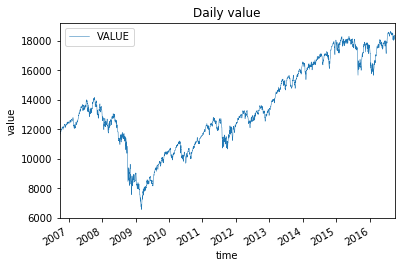

In [2]:
DJIA = pd.read_csv('DJIA.csv')
DJIA.index = pd.to_datetime(DJIA['DATE'])
DJIA = DJIA[DJIA['VALUE'] != '.']
DJIA = DJIA.drop(columns = 'DATE')
DJIA['VALUE'] = DJIA['VALUE'].astype(float)
DJIA.plot(lw = 0.5)
plt.title('Daily value')
plt.xlabel('time')
plt.ylabel('value')
plt.show()

2. The file `paychecks.csv` contains values of an hourly employee’s last 93 paychecks. He started working March 13, 2008. This company hands out paychecks on the first and third Fridays of the month. Read in the data, using `pd.date_range()` to generate the DatetimeIndex. Plot the data. (Hint: use the `union()` method of DatetimeIndex class.)

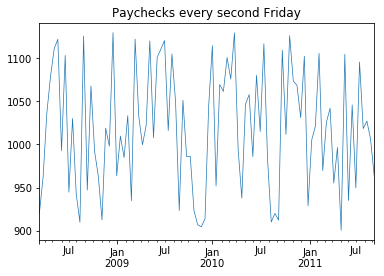

In [3]:
paychecks = pd.read_csv('paychecks.csv')
paychecks.sample(5)
paychecks.index = pd.date_range(start = '03/13/2008', periods = 92, freq = '2W-FRI')
paychecks.plot(lw = 0.7, legend = False)
plt.title('Paychecks every second Friday')
plt.show()

3. Compute the following information about the DJIA dataset from Problem 1.

    • The single day with the largest gain.
    
    • The single day with the largest loss.
    
    • The month with the largest gain.
    
    • The month with the largest loss.
    
    For the monthly statistics, define the gain (or loss) to be the difference between the DJIA on the last and first days of the month.

In [4]:
DJIA
onedaychange = DJIA - DJIA.shift(1)
print(onedaychange.idxmax()[0], ' has maximum gain ', onedaychange.max()[0])

2008-10-13 00:00:00  has maximum gain  936.4200000000001


In [5]:
print(onedaychange.idxmin()[0], ' has maximum loss ', onedaychange.min()[0])

2008-09-29 00:00:00  has maximum loss  -777.6799999999985


In [6]:
DJIAmonthstart = DJIA.resample('M').first()
DJIAmonthend = DJIA.resample('M').last()
monthchange = DJIAmonthend - DJIAmonthstart
print(monthchange.idxmax()[0], ' has maximum gain ', monthchange.max()[0])

2015-10-31 00:00:00  has maximum gain  1391.5300000000007


In [7]:
print(monthchange.idxmin()[0], ' has maximum loss ', monthchange.min()[0])

2008-10-31 00:00:00  has maximum loss  -1506.0599999999995


6. Plot the following from the DJIA dataset with a window or span of 30, 120, and 365.

    • The original data points.

    • Rolling average.

    • Exponential average.

    • Minimum rolling values.

    • Maximum rolling values.
    
    Describe how varying the length of the window changes the approximation to the data.

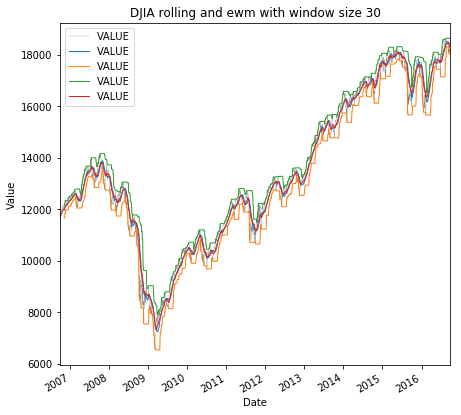

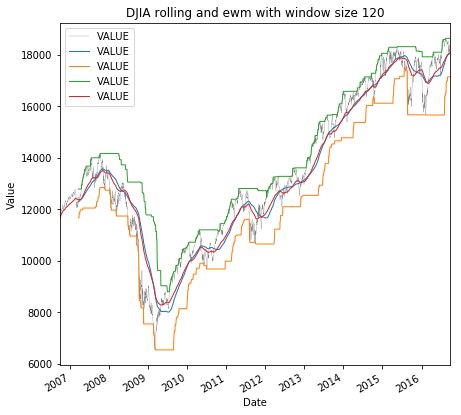

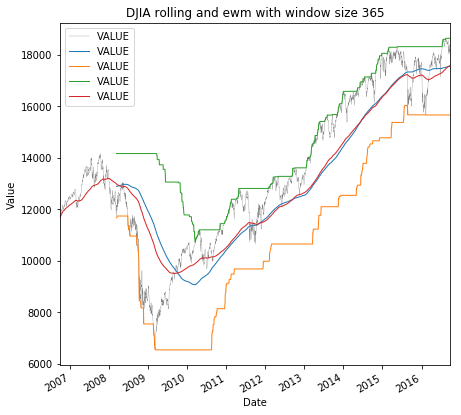

In [8]:
def rolling_ewm(data, dataname, size):
    
    fig, ax = plt.subplots(figsize = (7,7))
    data.plot(color="gray", lw=.3, ax = ax)
    data.rolling(window = size).mean().plot(label = 'rolling average', lw=1, ax = ax)
    data.rolling(window = size).min().plot(label = 'rolling minimum', lw=1, ax = ax)
    data.rolling(window = size).max().plot(label = 'rolling maximum', lw=1, ax = ax)
    data.ewm(span = size).mean().plot(label = 'EWMA', lw=1, ax = ax)
    plt.legend()
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.title('{} rolling and ewm with window size {}'.format(dataname, size))
    plt.show()
    
rolling_ewm(DJIA, 'DJIA', 30)
rolling_ewm(DJIA, 'DJIA', 120)
rolling_ewm(DJIA, 'DJIA', 365)